<div>
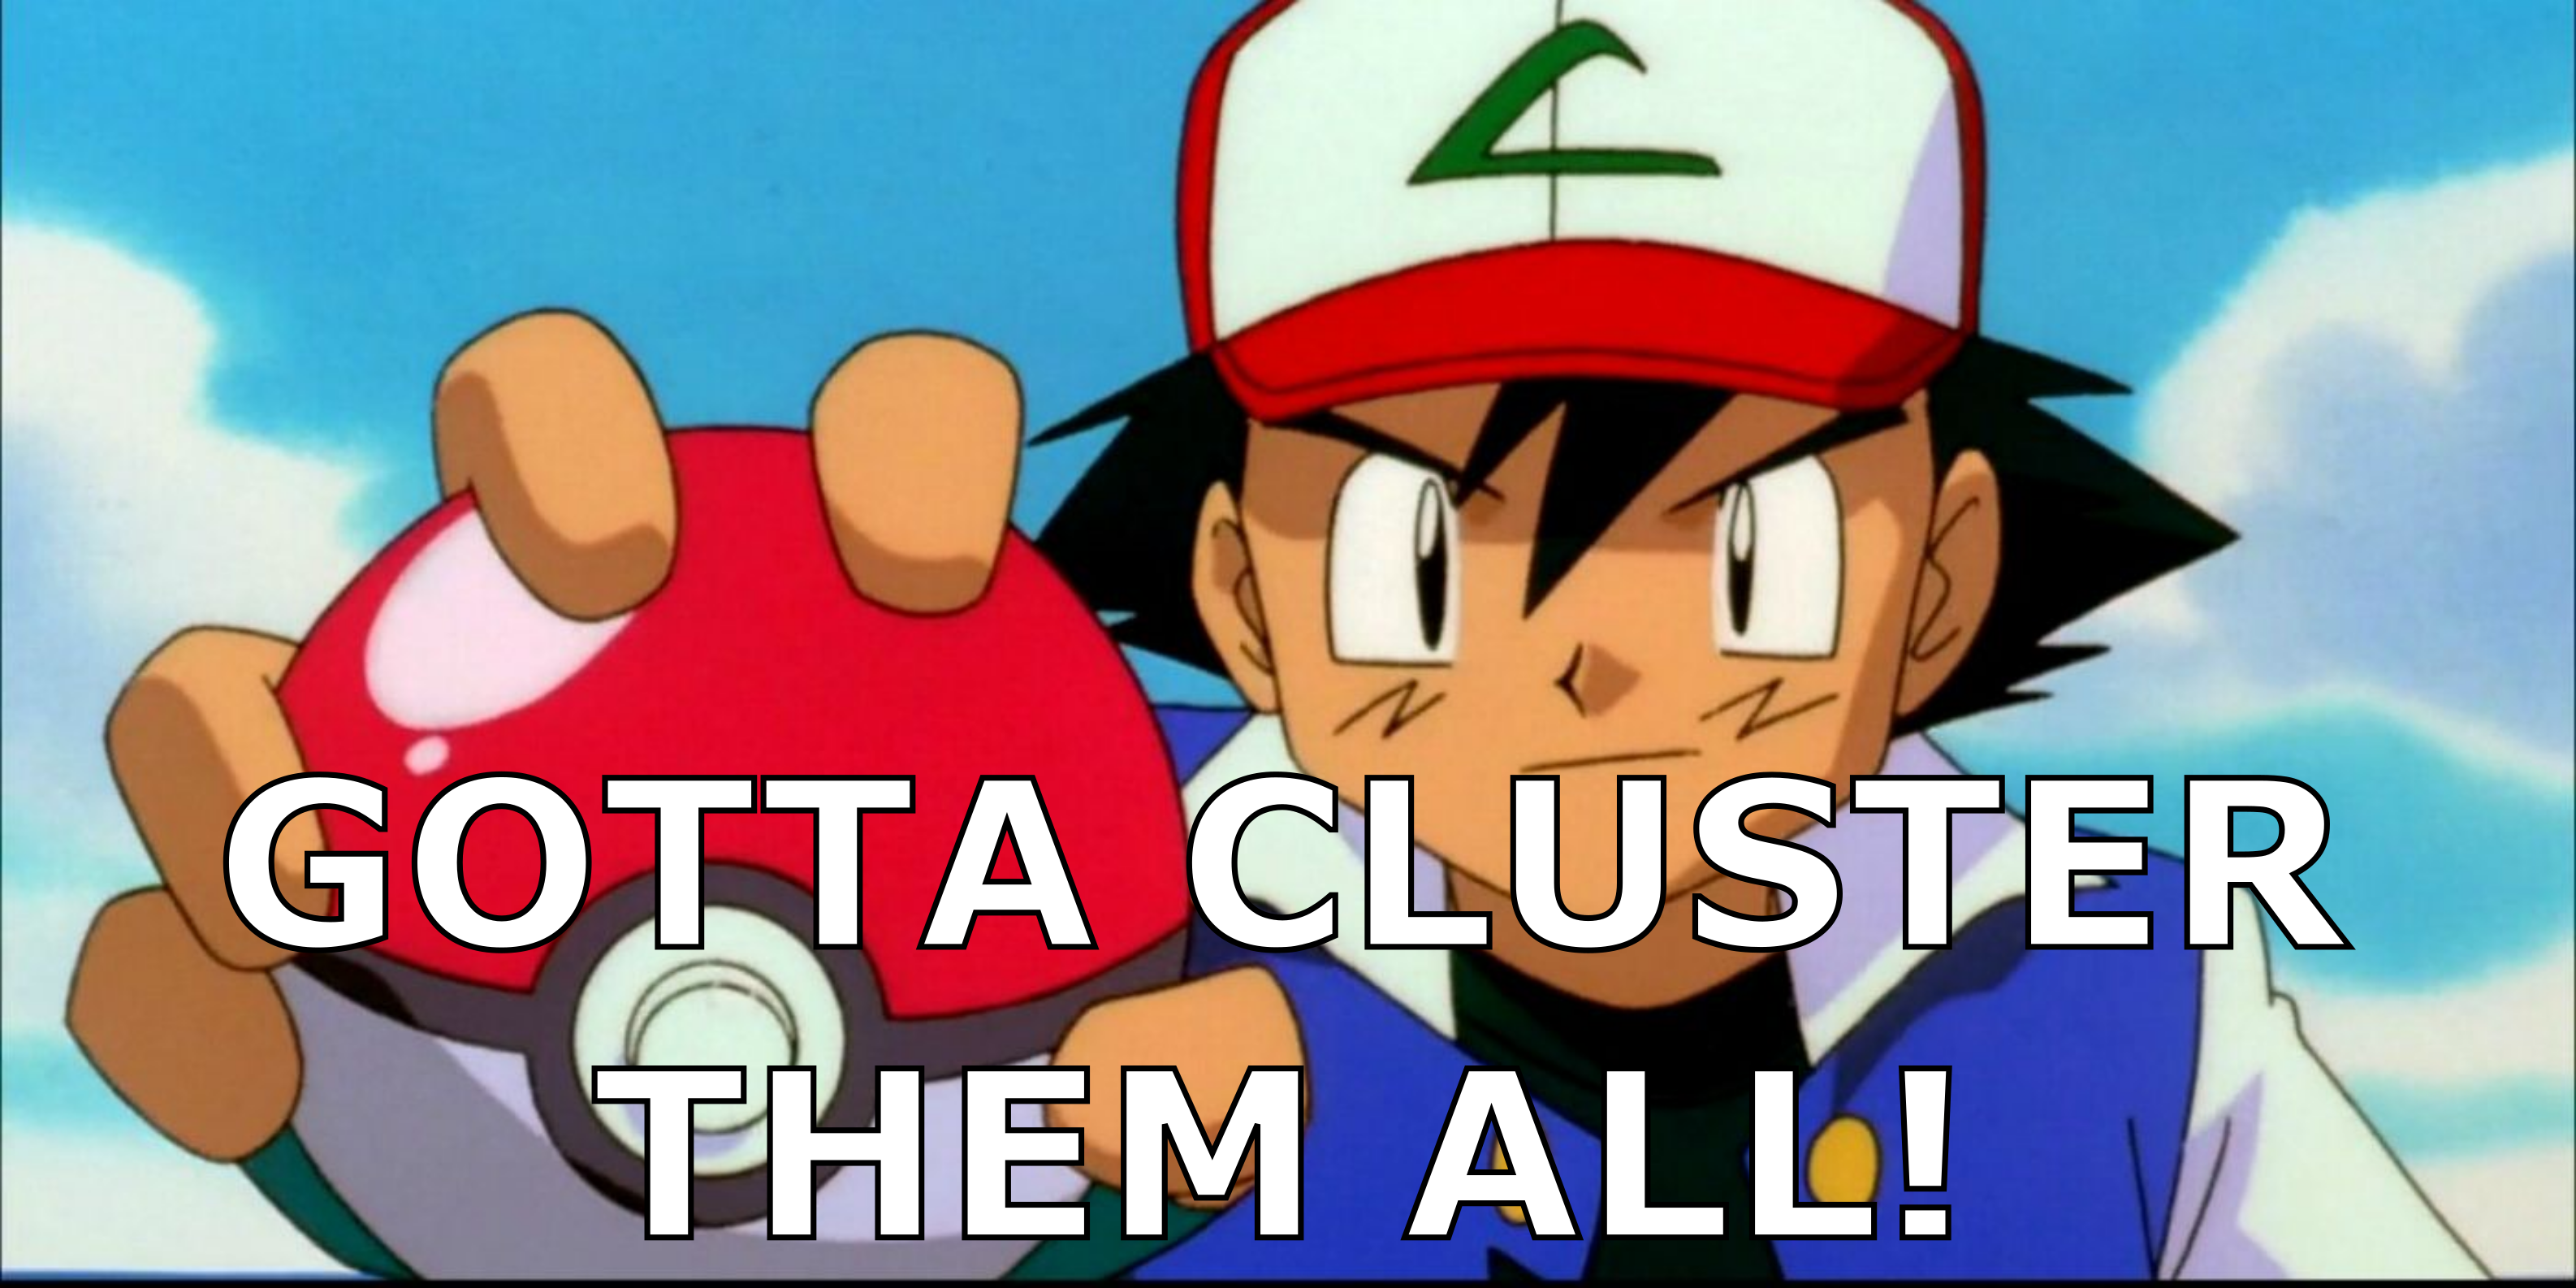
</div>

# Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 1. Get Data

__Mall Customer Data__
* `CustomerID` - Unique customer ID
* `Gender	` - Customer Gender
* `Age` - Customer Age
* `Income` - Annual customer Income (€)

__Mall Score Data__
* `CustomerID` - Unique customer ID
* `Score` - Score assigned by the mall based on customer behavior and spending nature


1. Import both datasets: `mall_customer_data.csv` and `mall_score_data.xlsx` and display the first 5 rows of each dataset

In [2]:
df_customer = pd.read_csv('mall_customer_data.csv')
df_customer.head()

CustomerID  Gender  Age  Income
0         125  Female   23   70000
1          63  Female   67   47000
2          24    Male   31   25000
3          46  Female   24   39000
4           1    Male   19   15000

In [3]:
df_score = pd.read_excel('mall_score_data.xlsx')
df_score.head()

CustomerID  Score
0         183     15
1          39     26
2          77     53
3         102     48
4         164     93

2. As you can see, both datasets can be merged using the ID of the customer.<br>Create a pandas DataFrame with the result of an `inner` merge on `CustomerID`

In [4]:
df = df_customer.merge(df_score, on = 'CustomerID', how = 'inner')
df.head()

CustomerID  Gender  Age  Income  Score
0         125  Female   23   70000     29
1          63  Female   67   47000     52
2          24    Male   31   25000     73
3          46  Female   24   39000     65
4           1    Male   19   15000     39

3. Set the CustomerID as our new DataFrame Index

In [5]:
df.set_index('CustomerID', inplace = True)

In [6]:
df.head()

Gender  Age  Income  Score
CustomerID                            
125         Female   23   70000     29
63          Female   67   47000     52
24            Male   31   25000     73
46          Female   24   39000     65
1             Male   19   15000     39

# 2. Explore

3. How many rows and columns does our data have?

In [7]:
df.shape

(200, 4)

4. What are the feature types?

In [8]:
df.dtypes

Gender    object
Age        int64
Income     int64
Score      int64
dtype: object

5. Display the summary statistics for the numerical features

In [9]:
df.describe()

Age         Income       Score
count  200.000000     200.000000  200.000000
mean    38.850000   60560.000000   50.200000
std     13.969007   26264.721165   25.823522
min     18.000000   15000.000000    1.000000
25%     28.750000   41500.000000   34.750000
50%     36.000000   61500.000000   50.000000
75%     49.000000   78000.000000   73.000000
max     70.000000  137000.000000   99.000000

6. How many missing values do we have?

In [10]:
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

7. Using seaborn's `countplot`, create a visualization that plots the distinct `Gender` frequency

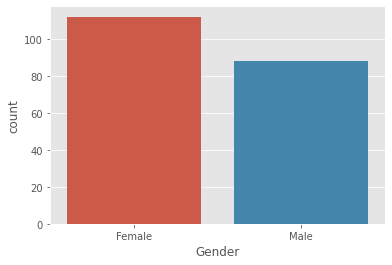

In [11]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Gender', data = df)
plt.show()

8. Using a pairplot, plot the distribution of our data, having a distinct color for each Gender. What can you conclude on the variable `Gender` ? 

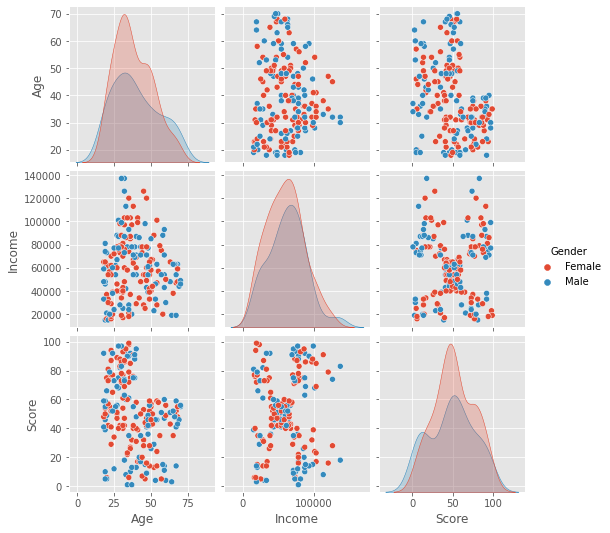

In [12]:
sns.pairplot(df, hue = 'Gender')
plt.show()

9. Lastly, let's check if there are any significant correlations in our data. To do so, print the correlation matrix and display a heatmap of the linear associations between features.

In [13]:
df.corr()

Age    Income     Score
Age     1.000000 -0.012398 -0.327227
Income -0.012398  1.000000  0.009903
Score  -0.327227  0.009903  1.000000

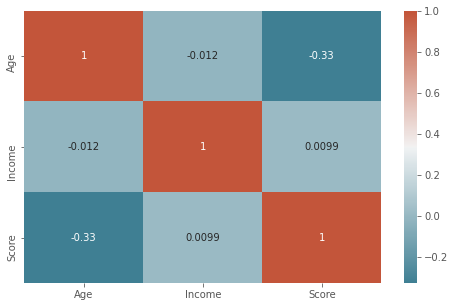

In [14]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

# 2. Transform

10. Create a DataFrame called `df_T` which will be a transformed copy of our data __without__ the variable `Gender`

In [15]:
df_T = df.drop(columns = ['Gender']).copy()

11. Since __clustering works on distances__, it is very important to normalize the data!<br>
Using a Min-Max scaler, let's transform the values of our variables in a [0-1] range.<br>
_Make sure the end result is a Pandas DataFrame with all the original characteristics but with the values normalized._

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_T)
df_scaled = pd.DataFrame(df_scaled, columns = df_T.columns, index = df_T.index)

In [17]:
df_scaled.head()

Age    Income     Score
CustomerID                              
125         0.096154  0.450820  0.285714
63          0.942308  0.262295  0.520408
24          0.250000  0.081967  0.734694
46          0.115385  0.196721  0.653061
1           0.019231  0.000000  0.387755

12. Let's also create a simple DataFrame called `df_clustered` which will be an exact copy of the initial merged data.

In [18]:
df_clustered = df.copy()

# 3. Clustering

## 3.1. K-Means

13. Build an initial elbow plot to evaluate the optimal number of clusters:
        1. Define a variable called nr_clusters and assign it a number between 1 and 200  
        2. Define an empty list called sse
        3. Create a loop that iterates from 1 to X clusters (choose any X you like)
            3.1. At each step, create an instance of a K-means algorithm with K clusters
            3.2. At each step, fit the K-Means algorithm to your scaled data
            3.3. At each step, append the total inertia to the sse list
        4. Build a DataFrame called df_sse with 2 columns: The list of clusters and the corresponding error
        5. Build the elbow plot: The association between number of clusters and total within sum os squared errors

In [19]:
from sklearn.cluster import KMeans

nr_clusters = 25
sse = []

for k in range(1, nr_clusters + 1):
    kmeans_model = KMeans(n_clusters = k, random_state = 0)
    kmeans_model.fit(df_scaled)
    sse.append(kmeans_model.inertia_)

In [20]:
df_sse = pd.DataFrame({'nr_clusters': range(1, nr_clusters + 1), 'sse': sse})
df_sse.head()

nr_clusters        sse
0            1  37.401482
1            2  22.560775
2            3  17.371946
3            4  12.650288
4            5  10.303965

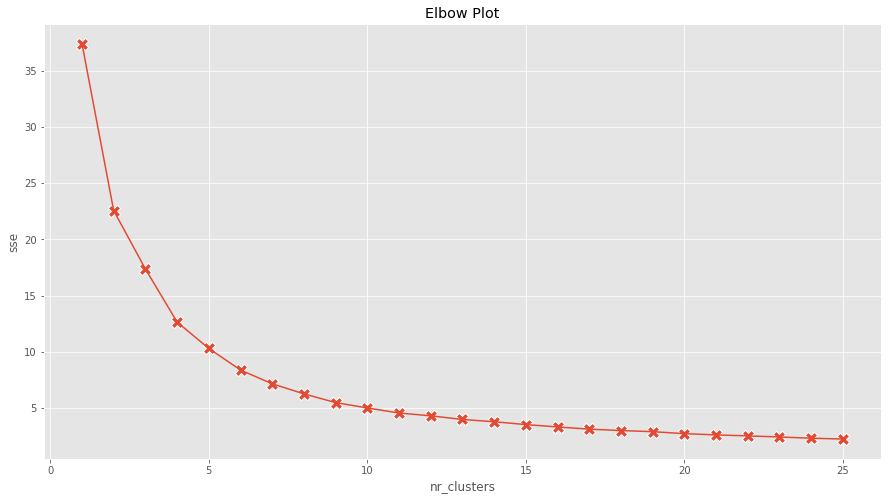

In [21]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
plt.title('Elbow Plot')
plt.show()

14. How many clusters do you think we should use? Create a single instance of the k-means model with that K number and fit the scaled data

In [22]:
# Cluster

nr_clusters = 3

kmeans_model = KMeans(n_clusters = nr_clusters, random_state = 0)
kmeans_model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

15. Print the total error

In [23]:
print(kmeans_model.inertia_)

17.371946164404164


16. Using the `df_clustered`, create a new column called `cluster_kmeans` which corresponds to the labels returned by the k-means model

In [24]:
df_clustered['cluster_kmeans'] = kmeans_model.labels_

17. Calculate the centroids of each cluster

In [25]:
centroids_kmeans = df_clustered.groupby('cluster_kmeans').mean()
centroids_kmeans

Age        Income      Score
cluster_kmeans                                    
0               28.457447  60244.680851  70.446809
1               54.187500  47359.375000  40.562500
2               38.738095  81380.952381  19.571429

18. What can you conclude? Use visualizations for better results _[open question]_

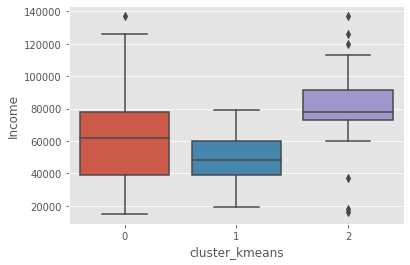

In [26]:
sns.boxplot(data = df_clustered, x = 'cluster_kmeans', y = 'Income')
plt.show()

Try running the code lines below, you can explore them at home

In [27]:
centroids_kmeans = df_clustered.groupby('cluster_kmeans').mean()

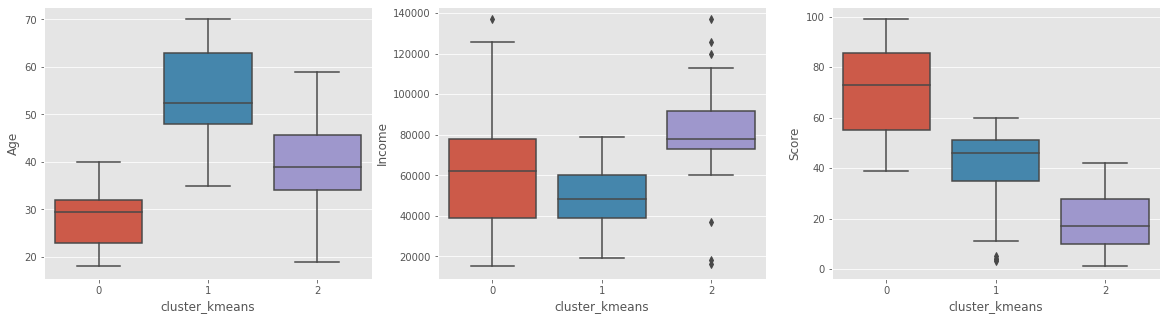

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.boxplot(data = df_clustered, x = 'cluster_kmeans', y = 'Age', ax = ax[0])
sns.boxplot(data = df_clustered, x = 'cluster_kmeans', y = 'Income', ax = ax[1])
sns.boxplot(data = df_clustered, x = 'cluster_kmeans', y = 'Score', ax = ax[2])
plt.show()

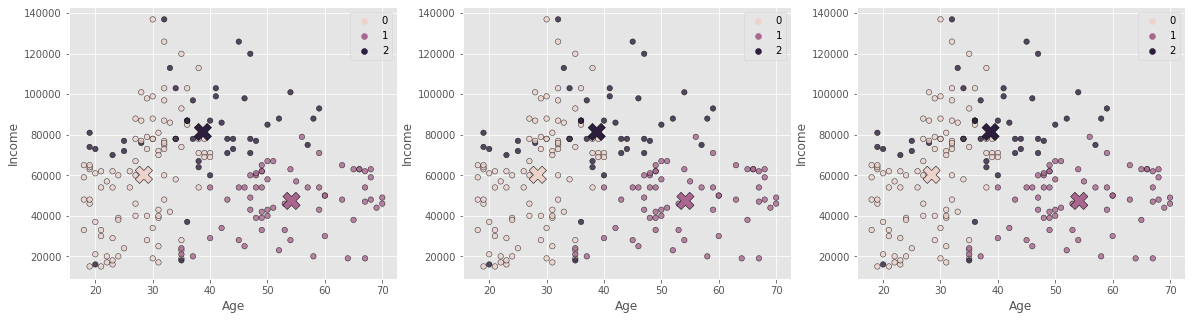

In [29]:
def plot_scatter_cluster(data, centroids, x, y, hue, ax):
    sns.scatterplot(data = data, x = x, y = y, hue = hue,s = 30, linewidth = .5,  edgecolor = 'black', alpha = .8,ax = ax)
    sns.scatterplot(data = centroids, x = x, y = y, hue = hue,s = 300, marker = 'X', linewidth = .5,  edgecolor = 'black',legend = False, ax = ax)
    ax.legend(loc = 'upper right')
    

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'Age', y = 'Income', hue = 'cluster_kmeans', ax = ax[0])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'Age', y = 'Income', hue = 'cluster_kmeans', ax = ax[1])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'Age', y = 'Income', hue = 'cluster_kmeans', ax = ax[2])
plt.show()

## 3.2. Hierarchical Clustering

19. Now let's experiment with the Hierarchical clustering algorithm. Start by drawing the dendrogram for our scaled data using the ward linkage method

In [30]:
import scipy.cluster.hierarchy as sch

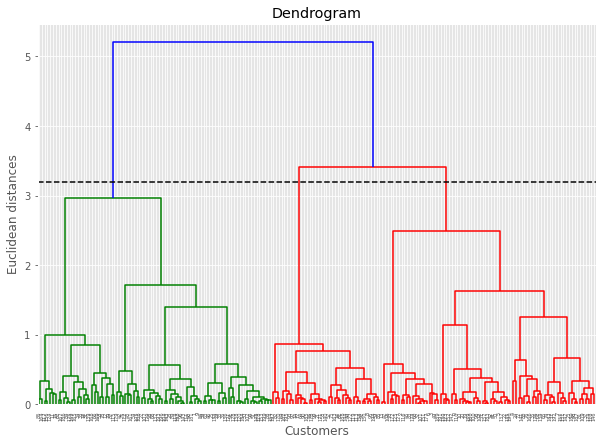

In [31]:
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method  = "ward"))
plt.axhline(y = 3.2, color = 'black', linestyle = '--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

20. What do you think its the optimal number of clusters? Assign an instance of the agglomerative clustering algorithm and fit it to your scaled data

In [32]:
from sklearn.cluster import AgglomerativeClustering

hier_model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
hier_model = hier_model.fit(df_scaled)

21. Append the result labels to the `df_clustered` DataFrame in a new column called `hier_cluster`

In [33]:
df_clustered['hier_cluster'] = hier_model.labels_

22. Calculate the centroids of eachc cluster

In [34]:
hier_centroids = df_clustered.groupby('hier_cluster').mean()[['Age', 'Income', 'Score']]
hier_centroids

Age        Income      Score
hier_cluster                                    
0             51.988095  63714.285714  33.440476
1             27.636364  43961.038961  52.311688
2             32.692308  86538.461538  82.128205

23. What can you conclude? Use visualizations for better results [open question]

# Summary

Some useful code to retrieve from this class:

In [35]:
'''# draw elbow plot
def plot_elbow(df, max_clusters):
    from sklearn.cluster import KMeans
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans_model = KMeans(n_clusters = k, random_state = 0)
        kmeans_model.fit(df)
        sse.append(kmeans_model.inertia_)
    df_sse = pd.DataFrame({'nr_clusters': range(1, max_clusters + 1), 'sse': sse})
    plt.figure(figsize = (12, 7))
    sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
    sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
    plt.title('Elbow Plot')
    plt.ylabel('Total Within Sum of Squared Errors', fontsize = 10)
    plt.xlabel('Nr. of Clusters', fontsize = 10)
    plt.show()
    
# How to use:
# plot_elbow(df = df_scaled, max_clusters = 20)'''

"# draw elbow plot\ndef plot_elbow(df, max_clusters):\n    from sklearn.cluster import KMeans\n    sse = []\n    for k in range(1, max_clusters + 1):\n        kmeans_model = KMeans(n_clusters = k, random_state = 0)\n        kmeans_model.fit(df)\n        sse.append(kmeans_model.inertia_)\n    df_sse = pd.DataFrame({'nr_clusters': range(1, max_clusters + 1), 'sse': sse})\n    plt.figure(figsize = (12, 7))\n    sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')\n    sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)\n    plt.title('Elbow Plot')\n    plt.ylabel('Total Within Sum of Squared Errors', fontsize = 10)\n    plt.xlabel('Nr. of Clusters', fontsize = 10)\n    plt.show()\n    \n# How to use:\n# plot_elbow(df = df_scaled, max_clusters = 20)"

In [36]:
'''# Define k means model
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters = k, random_state = 0)
model.fit(x) # make sure you fit in the scaled data'''

'# Define k means model\nfrom sklearn.cluster import KMeans\n\nk = 3\nmodel = KMeans(n_clusters = k, random_state = 0)\nmodel.fit(x) # make sure you fit in the scaled data'

In [37]:
'''# draw dendrogram
def plot_dendrogram(df, linkage_method = 'ward'):
    import scipy.cluster.hierarchy as sch
    # Draw Dendrogram
    plt.figure(figsize = (10, 7))
    dendrogram = sch.dendrogram(sch.linkage(df, method  = linkage_method))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()
    
# How to use:
# plot_dendrogram(df = df_scaled, linkage_method = 'ward')'''

"# draw dendrogram\ndef plot_dendrogram(df, linkage_method = 'ward'):\n    import scipy.cluster.hierarchy as sch\n    # Draw Dendrogram\n    plt.figure(figsize = (10, 7))\n    dendrogram = sch.dendrogram(sch.linkage(df, method  = linkage_method))\n    plt.title('Dendrogram')\n    plt.xlabel('Customers')\n    plt.ylabel('Euclidean distances')\n    plt.show()\n    \n# How to use:\n# plot_dendrogram(df = df_scaled, linkage_method = 'ward')"

In [38]:
'''# Define Hierarchical Agglomerative model

from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
linkage = 'ward'
model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = linkage)
model = model.fit(x)'''

"# Define Hierarchical Agglomerative model\n\nfrom sklearn.cluster import AgglomerativeClustering\n\nn_clusters = 3\nlinkage = 'ward'\nmodel = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = linkage)\nmodel = model.fit(x)"